<a href="https://colab.research.google.com/github/AchalGhadge/Cloud_project/blob/main/MTech_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
da = files.upload()

Saving DataAnalyst.csv to DataAnalyst.csv


In [2]:
import numpy as np
import math
import pandas as pd
import io
from statsmodels.stats.weightstats import ztest
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 30)
pd.options.mode.chained_assignment = None



In [3]:
# For data vis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'darkgrid')

import warnings
warnings.filterwarnings('ignore')


In [4]:
DA = pd.read_csv(io.BytesIO(da['DataAnalyst.csv']),sep=',',index_col=0)
DA1 = pd.DataFrame(DA)
DA1

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


In [5]:
DA1.shape


(2253, 15)

In [6]:
DA1.nunique()


Job Title            1272
Salary Estimate        90
Job Description      2253
Rating                 37
Company Name         1513
Location              253
Headquarters          483
Size                    9
Founded               161
Type of ownership      15
Industry               89
Sector                 25
Revenue                14
Competitors           291
Easy Apply              2
dtype: int64

In [7]:
(DA1 == '-1').sum()


Job Title               0
Salary Estimate         1
Job Description         0
Rating                  0
Company Name            0
Location                0
Headquarters          172
Size                  163
Founded                 0
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64

In [8]:
DA1 = DA1[DA1['Salary Estimate'] != '-1']
(DA1['Salary Estimate'] == '-1').sum()

0

In [9]:
salary = DA1['Salary Estimate'].apply(lambda x : x.split('(')[0])

# Removing K and dollar sign from Salary Estimate
rm_kd = salary.apply(lambda x : x.replace('K','').replace('$',''))
rm_kd

0        37-66 
1        37-66 
2        37-66 
3        37-66 
4        37-66 
         ...   
2248    78-104 
2249    78-104 
2250    78-104 
2251    78-104 
2252    78-104 
Name: Salary Estimate, Length: 2252, dtype: object

In [10]:
DA1['min_salary'] = rm_kd.apply(lambda x : int(x.split('-')[0]))
DA1['max_salary'] = rm_kd.apply(lambda x : int(x.split('-')[1]))
DA1['avg_salary'] = (DA1.min_salary + DA1.max_salary) / 2
DA1.sample(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,min_salary,max_salary,avg_salary
2202,Financial Data Analyst,$49K-$91K (Glassdoor est.),Position:Financial Data AnalystJob Description...,-1.0,Black Knight Financial Technology Solutions,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1,49,91,70.0
660,Sr Performance Metrics Data Analyst,$65K-$81K (Glassdoor est.),Position InformationJob Title: Sr. Performance...,-1.0,BBCN Bank,"Los Angeles, CA",-1,-1,-1,-1,-1,-1,-1,-1,-1,65,81,73.0


In [11]:
# Getting state abbreviations from "Location"
DA1['job_state'] = DA1['Location'].apply(lambda x : x.split(',')[1])
DA1['job_state'].unique()


array([' NY', ' NJ', ' UT', ' CA', ' VA', ' FL', ' IL', ' TX', ' AZ',
       ' PA', ' DE', ' OH', ' NC', ' SC', ' IN', ' WA', ' GA', ' KS',
       ' CO', ' Arapahoe'], dtype=object)

In [12]:
# Getting state abbreviations from "Location"
DA1['job_state'] = DA1['Location'].apply(lambda x : x.split(',')[1])
DA1['job_state'].unique()


array([' NY', ' NJ', ' UT', ' CA', ' VA', ' FL', ' IL', ' TX', ' AZ',
       ' PA', ' DE', ' OH', ' NC', ' SC', ' IN', ' WA', ' GA', ' KS',
       ' CO', ' Arapahoe'], dtype=object)

In [13]:
# Parsing Skills from Job Descriptions
DA1['Python'] = DA1['Job Description'].apply(lambda x : 1 if 'python' in x.lower() else 0)
DA1['R'] = DA1['Job Description'].apply(lambda x : 1 if 'R ' in x else 0)
DA1['SAS'] = DA1['Job Description'].apply(lambda x : 1 if 'SAS' in x else 0)
DA1['SQL'] = DA1['Job Description'].apply(lambda x : 1 if 'sql' in x.lower() else 0)
DA1['Java'] = DA1['Job Description'].apply(lambda x : 1 if 'java' in x.lower() else 0)
DA1['AWS'] = DA1['Job Description'].apply(lambda x : 1 if 'aws' in x.lower() else 0)
DA1['SPSS'] = DA1['Job Description'].apply(lambda x : 1 if 'spss' in x.lower() else 0)
DA1['Excel'] = DA1['Job Description'].apply(lambda x : 1 if 'excel' in x.lower() else 0)
DA1['Tableau'] = DA1['Job Description'].apply(lambda x : 1 if 'tableau' in x.lower() else 0)
DA1['PowerBI'] = DA1['Job Description'].apply(lambda x : 1 if 'powerbi' in x.lower() or 'power bi' in x.lower() else 0)
DA1['Hadoop'] = DA1['Job Description'].apply(lambda x : 1 if 'hadoop' in x.lower() else 0)
DA1['Spark'] = DA1['Job Description'].apply(lambda x : 1 if 'spark' in x.lower() else 0)
DA1['Machine Learning'] = DA1['Job Description'].apply(lambda x : 1 if 'machine learning' in x.lower() or 'ML' in x else 0)
DA1['Statistics'] = DA1['Job Description'].apply(lambda x : 1 if 'statistics' in x.lower() or 'stats' in x.lower() or 'statistical' in x.lower() else 0)
DA1['A/B Testing'] = DA1['Job Description'].apply(lambda x : 1 if 'a/b testing' in x.lower() else 0)

In [14]:
DA1[['Python','R','SAS','SQL','Java','AWS','SPSS','Excel','Tableau','PowerBI',
    'Hadoop','Spark','Machine Learning','Statistics','A/B Testing']].sample(3)

,Python,R,SAS,SQL,Java,AWS,SPSS,Excel,Tableau,PowerBI,Hadoop,Spark,Machine Learning,Statistics,A/B Testing
937,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
386,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0
319,1,0,1,1,0,0,0,1,1,1,0,0,0,0,0


In [15]:
# Parsing Job Seniority from Job Titles
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'Senior'
    elif 'jr' in title.lower() or 'jr' in title.lower() or 'junior' in title.lower() or 'entry' in title.lower():
        return 'Junior'
    elif 'intern' in title.lower() or 'internship' in title.lower() or 'temp' in title.lower():
        return 'Intern'
    else:
        return 'General'

DA1['job_seniority'] = DA1['Job Title'].apply(seniority)
DA1['job_seniority'].value_counts()

job_seniority
General    1668
Senior      481
Junior       86
Intern       17
Name: count, dtype: int64

In [16]:
# Removing strings after '\n' from Company Name
DA1['Company Name'] = DA1["Company Name"].apply(lambda x: str(x)[:-4])
DA1.sample(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,...,R,SAS,SQL,Java,AWS,SPSS,Excel,Tableau,PowerBI,Hadoop,Spark,Machine Learning,Statistics,A/B Testing,job_seniority
410,Sr. Principal Metrics Analyst- Data Scientist,$48K-$96K (Glassdoor est.),Technology Architecture and Data is the enterp...,3.2,The Bank of New York Mellon,"New York, NY","New York, NY",10000+ employees,1784,Company - Public,Investment Banking & Asset Management,Finance,$10+ billion (USD),"State Street, Northern Trust, BlackRock",-1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Senior
1331,Data Analyst (HR),$24K-$48K (Glassdoor est.),Role InformationLidl US Job DescriptionJob Tit...,3.3,Lidl,"Arlington, TX","London, United Kingdom",10000+ employees,1994,Company - Private,Grocery Stores & Supermarkets,Retail,$10+ billion (USD),"ALDI, Tesco, Carrefour",-1,...,1,0,1,1,1,0,1,0,1,0,0,0,0,0,General


In [17]:
# Dropping unwanted columns
DA1 = DA1.drop(['Salary Estimate','Headquarters', 'Size','Revenue','Easy Apply','Founded','Competitors'], axis = 1)
DA1.sample(2)

,Job Title,Job Description,Rating,Company Name,Location,Type of ownership,Industry,Sector,min_salary,max_salary,avg_salary,job_state,Python,R,SAS,SQL,Java,AWS,SPSS,Excel,Tableau,PowerBI,Hadoop,Spark,Machine Learning,Statistics,A/B Testing,job_seniority
477,USMTF Data Analyst,Oasis Systems has an exciting opportunity for ...,3.8,Oasis Systems,"Hampton, VA",Company - Private,IT Services,Information Technology,43,69,56.0,VA,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,General
1148,Business / Data Analyst,RESPONSIBILITIES:\n\nKforce has a client in se...,4.1,Kforce,"Wilmington, DE",Company - Public,Staffing & Outsourcing,Business Services,37,44,40.5,DE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,General


In [18]:
DA1.describe()


,Rating,min_salary,max_salary,avg_salary,Python,R,SAS,SQL,Java,AWS,SPSS,Excel,Tableau,PowerBI,Hadoop,Spark,Machine Learning,Statistics,A/B Testing
count,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000,2252.000000
mean,3.160080,54.266874,89.979130,72.123002,0.282860,0.177620,0.159414,0.616341,0.090586,0.122114,0.068384,0.600799,0.275311,0.110124,0.060391,0.039520,0.145648,0.374778,0.009769
std,1.665393,19.575375,29.315605,23.600734,0.450489,0.382277,0.366143,0.486384,0.287083,0.327490,0.252459,0.489843,0.446770,0.313114,0.238262,0.194873,0.352832,0.484173,0.098377
min,-1.000000,24.000000,38.000000,33.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100000,41.000000,70.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.600000,50.000000,87.000000,69.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,64.000000,104.000000,80.500000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.000000,113.000000,190.000000,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Looking at the decriptive statistics, we could see that the mean for average salary is about 72K, while the median falls around 69K. Let's plot the average salary in a histogram to see if the distribution is skewed.

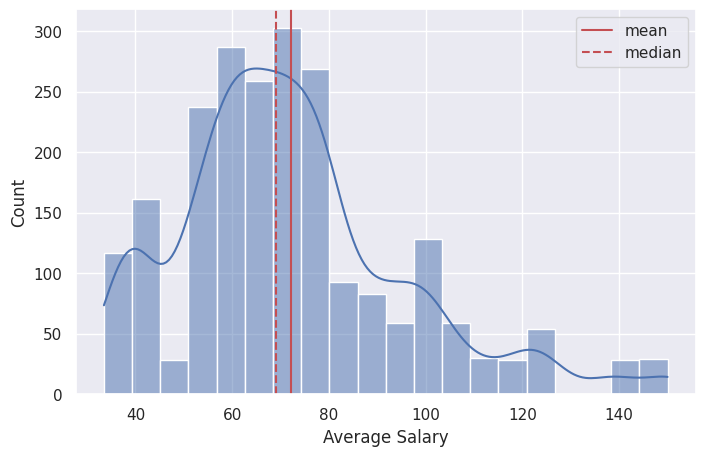

In [20]:
## Salary Distribution (Histogram)

plt.figure(figsize = (8,5))
ax = sns.histplot(x='avg_salary', data = DA1, bins = 20, kde = True)
ax.axvline(DA1['avg_salary'].mean(), color='r', linestyle='-', label = 'mean')
ax.axvline(DA1['avg_salary'].median(), color = 'r', linestyle='--', label = 'median')
plt.xlabel('Average Salary')
ax.legend()

plt.show()


As expected, the average salary distribution is slightly right-skewed with some outliers falling above 140K, causing the mean to be greater than the median. In this case, it would be better to refer to the median (69K) than to the mean.



**What industries are looking for data analysts and what are the salary differences?**

To start off, I created a dual-axis bar chart to get an overall idea of what are the top industries that are in demand for data analysts, as well as compare their average salaries.

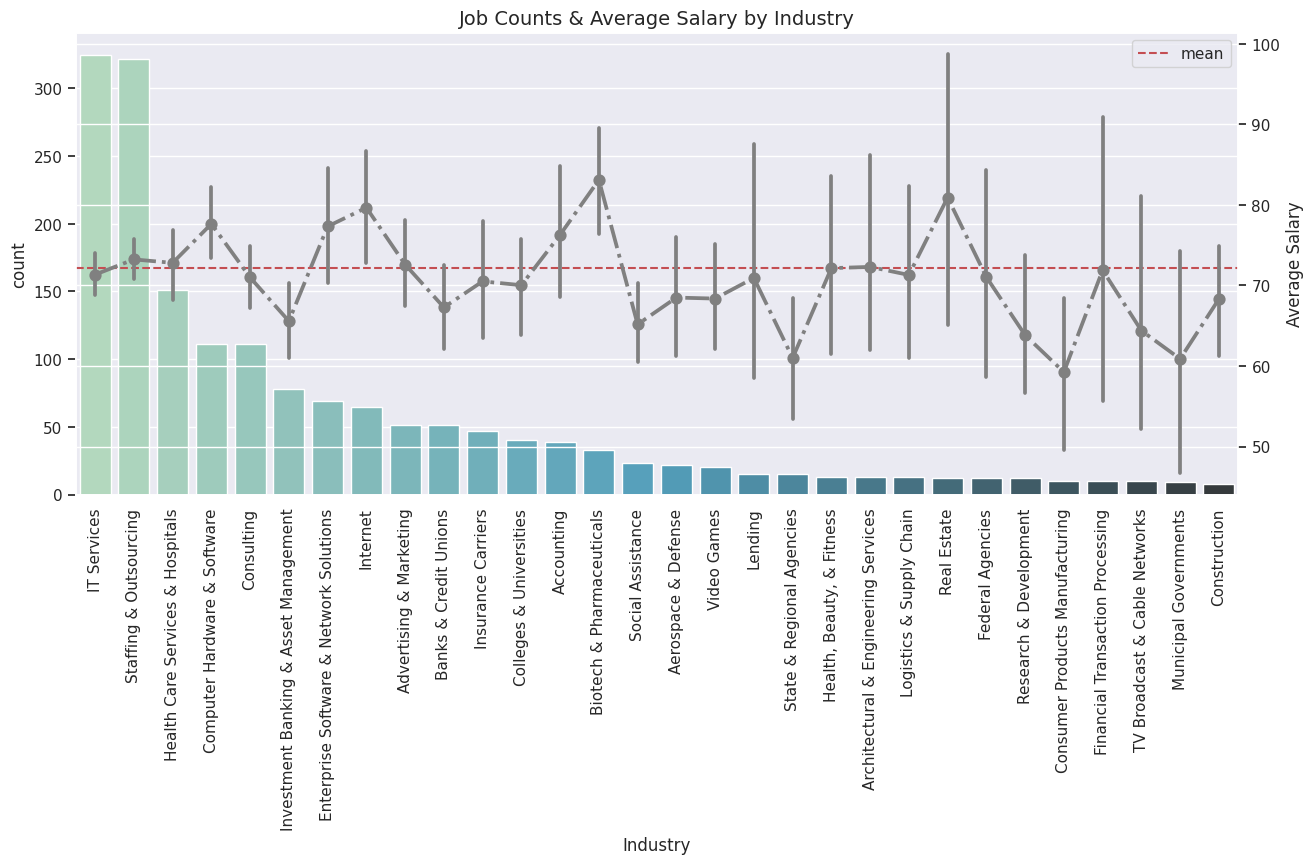

In [21]:
## Job Counts & Average Salary by Industry

def barPoint(col, num):

    # plotting the bars for job counts
    DA1_p = DA1[DA1[col] != '-1']
    plt.figure(figsize=(15, 6))
    count = DA1_p[col].value_counts().head(num)
    ax = sns.barplot(x = count.index, y = count, palette = 'GnBu_d')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

    # plotting the points for average salary
    ax2 = ax.twinx()
    ax2.axhline(DA1['avg_salary'].mean(), color='r', linestyle='--', label = 'mean')
    sns.pointplot(x = col, y = ('avg_salary'), data = DA1_p, ax = ax2, order = count.index, linestyles = '-.', color = 'gray')
    plt.ylabel('Average Salary')
    plt.title('Job Counts & Average Salary by ' + col, fontsize = 14)

    plt.show()


barPoint('Industry', 30) # display top 30 industries

As we can see from the graph above, industries like IT and Business Services are looking for the most data analysts, with provided salaries falling in around 70-75K. On the other hand, industries such as Biotech and Real Estate have relatively lower demands for data analysts on Glassdoor but are willing to pay higher amounts (80-85k).



Now that we've seen the industries that are more interested in looking for data analysts and how their salaries generally look like, let's take a closer look at the salary range for those industries:

In [22]:
top_30 = DA1['Industry'].value_counts()[1:31].index
top_30_DA1 = DA1[DA1['Industry'].isin(top_30)]
top_30_DA1['Industry'].nunique()


30

In [24]:
## Average Salary by Industry (Boxplot)

def boxplot(data, col, figsize):

    plt.figure(figsize = figsize)
    sort_avgslry = data.groupby(col).median().sort_values(by = 'avg_salary', ascending = False).index
    sns.boxplot(x = 'avg_salary', y = col, data = data, order = sort_avgslry, width = 0.7, palette = 'GnBu_d')
    plt.xlabel('Average Salary')
    plt.title('Average Salary by '+ col, fontsize = 14)

    plt.show()

From the first boxplot above, we could see that Education Training Services and Health Care Products Manufacturing are both industries with the highest medians of average salary. Their salaries are higher than the Biotech industry, yet from the previous job count graphs, we know that not many data analyst job opportunities from these industries could be found on Glassdoor. We could also see that, although the IT Service industry had the highest demand for data analysts, it did not end up in the list of top 30 industries with the highest Data Analyst salaries.

Therefore, before comparing their salaries, let's check their difference in sample size:



In [26]:
def get_job_count(industries):
    count = []
    for i in industries:
        count.append(DA1[DA1['Industry'] == i].shape[0])
    print (count)

get_job_count(['Biotech & Pharmaceuticals','Real Estate','Computer Hardware & Software'])
get_job_count(['IT Services','Staffing & Outsourcing','Health Care Services & Hospitals'])

[33, 12, 111]
[325, 322, 151]


Though the the Biotech industry and the Real Estate industry had the highest average salaries, there were only few relevant entries in this dataset, which is a huge difference in size in comparison with the IT Services industry. Let's create a histogram to see if they're normally distributed and conduct a simple z-test to see if there's really a significant differnece in their salary:

Text(0.5, 1.0, 'IT Services')

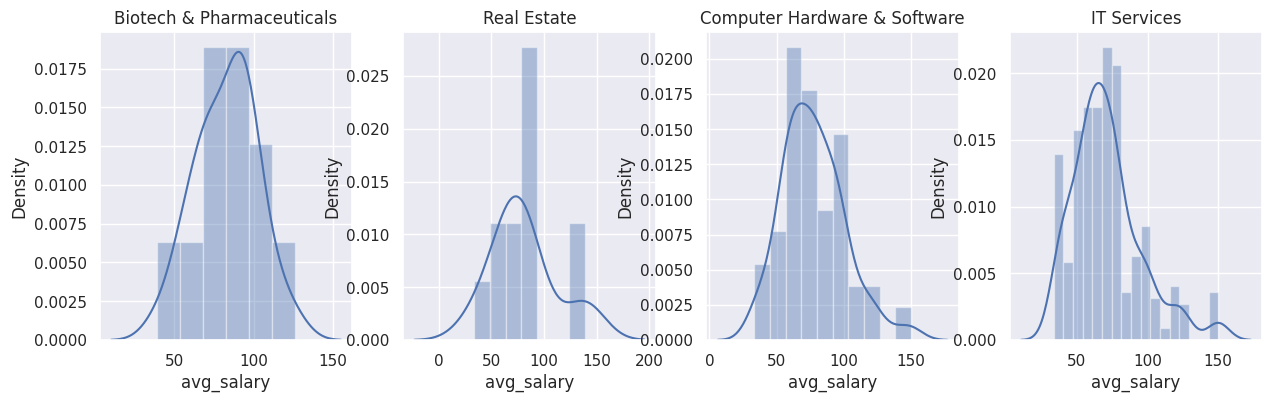

In [27]:
## Checking if their salaries are normally distributed
Bio = DA1[DA1['Industry']=='Biotech & Pharmaceuticals']['avg_salary']
Real = DA1[DA1['Industry']=='Real Estate']['avg_salary']
Comp = DA1[DA1['Industry']=='Computer Hardware & Software']['avg_salary']
IT = DA1[DA1['Industry']=='IT Services']['avg_salary']

fig, axs = plt.subplots(1, 4, figsize=(15,4))
sns.distplot(Bio, kde = True, ax = axs[0]).set_title('Biotech & Pharmaceuticals')
sns.distplot(Real, kde = True, ax = axs[1]).set_title('Real Estate')
sns.distplot(Comp, kde = True, ax = axs[2]).set_title('Computer Hardware & Software')
sns.distplot(IT, kde = True, ax = axs[3]).set_title('IT Services')


In [28]:
z_test1, pval1 = ztest(x1 = Bio, x2 = IT)
z_test2, pval2 = ztest(x1 = Real, x2 = IT)
z_test3, pval3 = ztest(x1 = Comp, x2 = IT)
print(pval1,pval2,pval3)

0.0073445336488563995 0.18671656974736828 0.017548261287371896


**Where do most data analyst jobs locate in and what are the salary differences?**



In [29]:
DA1['job_state'].nunique()

20

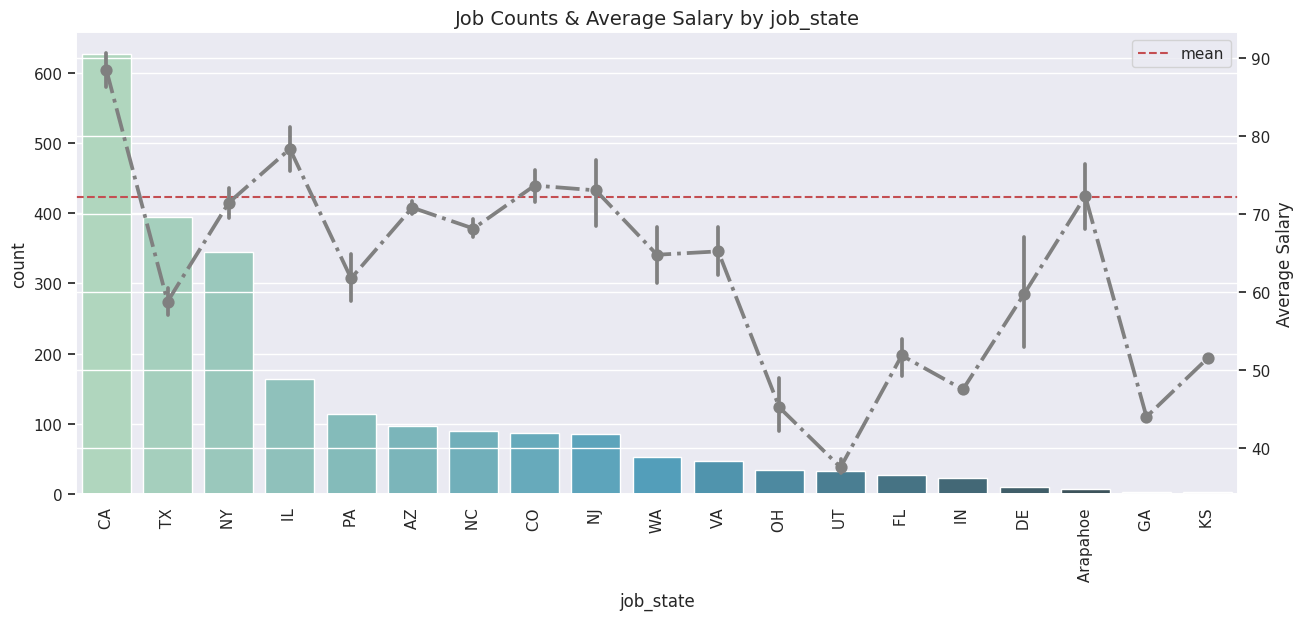

In [30]:
## Job Counts & Average Salary by State
barPoint('job_state',19)

What are the skills that most companies are looking for from applicants?



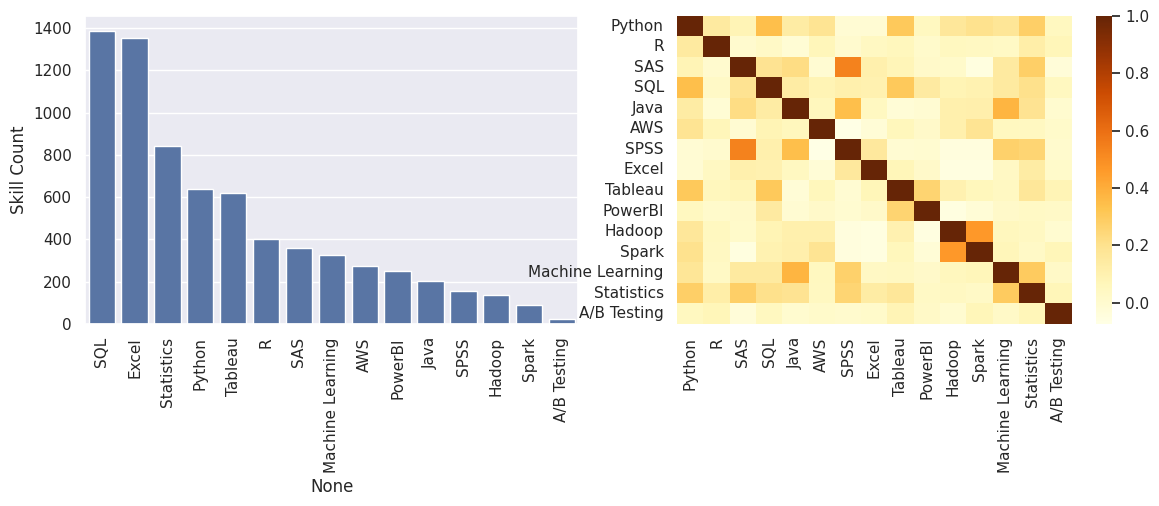

In [32]:
## Skill Counts Bar Chart & Correlation Heatmap
skills = ['Python','R','SAS','SQL','Java','AWS','SPSS','Excel','Tableau','PowerBI','Hadoop',
          'Spark','Machine Learning','Statistics','A/B Testing']

fig, axs = plt.subplots(1, 2, figsize=(14,4))
# barchart
sort_skills = DA1[skills].sum().sort_values(ascending = False)
sns.barplot(x = sort_skills.index, y = sort_skills, color = 'b', ax = axs[0])
axs[0].tick_params('x', labelrotation=90)
axs[0].set_ylabel('Skill Count')
# heatmap
correlation = DA1[skills].corr()
axs[1] = sns.heatmap(correlation, cmap="YlOrBr")

In [33]:
skills_by_seniority_DA1 = DA1[['job_seniority','Python','R','SAS','SQL','Java','AWS','SPSS','Excel',
                             'Tableau','PowerBI','Hadoop','Spark','Machine Learning','Statistics',
                             'A/B Testing']].groupby('job_seniority').sum().transpose()
skills_by_seniority_DA1

job_seniority,General,Intern,Junior,Senior
Python,436,4,7,190
R,297,1,8,94
SAS,246,1,46,66
SQL,999,4,61,324
Java,133,0,40,31
AWS,183,3,5,84
SPSS,107,0,39,8
Excel,1000,10,71,272
Tableau,411,2,10,197
PowerBI,178,0,5,65


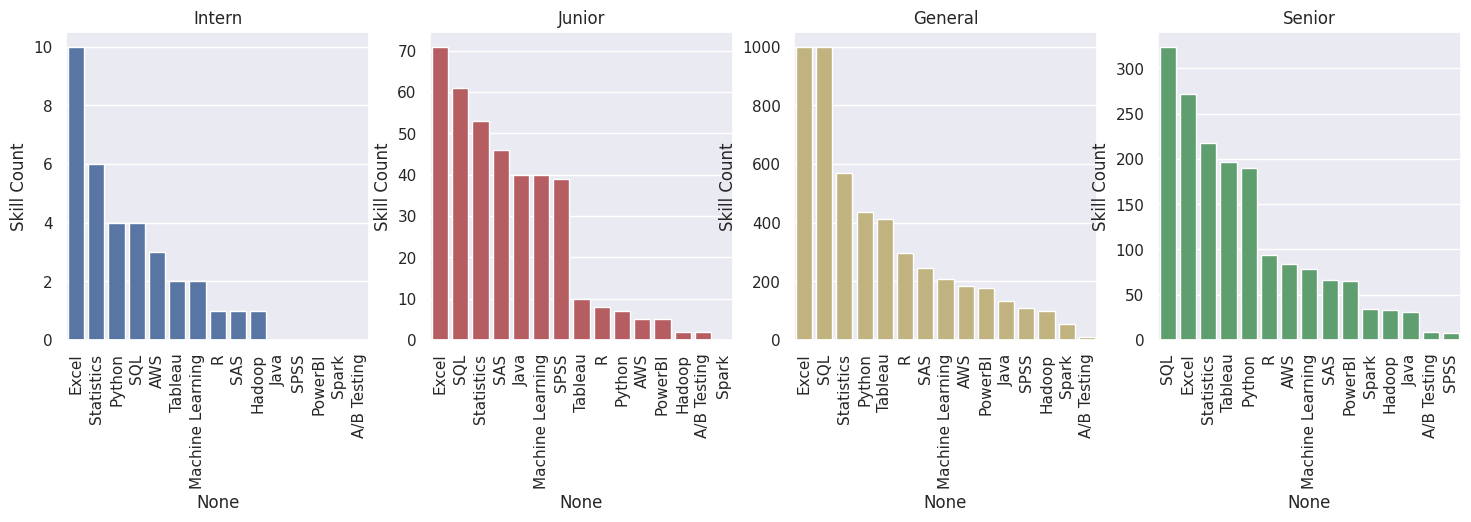

In [34]:
# Skill Counts for Different Job Seniorities
intern = skills_by_seniority_DA1['Intern'].sort_values(ascending = False)
jr = skills_by_seniority_DA1['Junior'].sort_values(ascending = False)
general = skills_by_seniority_DA1['General'].sort_values(ascending = False)
sr = skills_by_seniority_DA1['Senior'].sort_values(ascending = False)

fig, axs = plt.subplots(1, 4, figsize=(18,4))
sns.barplot(x = intern.index, y = intern, color = 'b' ,ax = axs[0]).set_title('Intern')
sns.barplot(x = jr.index, y = jr, color = 'r', ax = axs[1]).set_title('Junior')
sns.barplot(x = general.index, y = general, color = 'y', ax = axs[2]).set_title('General')
sns.barplot(x = sr.index, y = sr, color = 'g', ax = axs[3]).set_title('Senior')

for i in range(4):
    axs[i].tick_params('x', labelrotation=90)
    axs[i].set_ylabel('Skill Count')

In [35]:
top_6 = DA1['Industry'].value_counts()[1:7].index
top_6_DA1 = DA1[DA1['Industry'].isin(top_6)]

skills_by_industry_DA1 = top_6_DA1[top_6_DA1['Industry'] != '-1'][['Industry','Python','R','SAS','SQL','Java','AWS',
                        'SPSS','Excel','Tableau','PowerBI','Hadoop','Spark','Machine Learning','Statistics',
                        'A/B Testing']].groupby('Industry').sum().transpose()

In [36]:
top_6 = DA1['Industry'].value_counts()[1:7].index
top_6_DA1 = DA1[DA1['Industry'].isin(top_6)]


In [37]:
skills_by_industry_DA1 = top_6_DA1[top_6_DA1['Industry'] != '-1'][['Industry','Python','R','SAS','SQL','Java','AWS',
                        'SPSS','Excel','Tableau','PowerBI','Hadoop','Spark','Machine Learning','Statistics',
                        'A/B Testing']].groupby('Industry').sum().transpose()

In [38]:
# Creating a column that stores the number of skills mentioned from each company
top_6_DA1['Required Skills Count'] = 0
for i in skills:
    top_6_DA1['Required Skills Count'] += top_6_DA1[i]
top_6_DA1[['Industry','Required Skills Count']].groupby('Industry').mean().sort_values('Required Skills Count', ascending = False)


,Required Skills Count
Industry,
Health Care Services & Hospitals,3.602649
IT Services,3.356923
Computer Hardware & Software,2.981982
Investment Banking & Asset Management,2.833333
Consulting,2.747748
Staffing & Outsourcing,2.527950


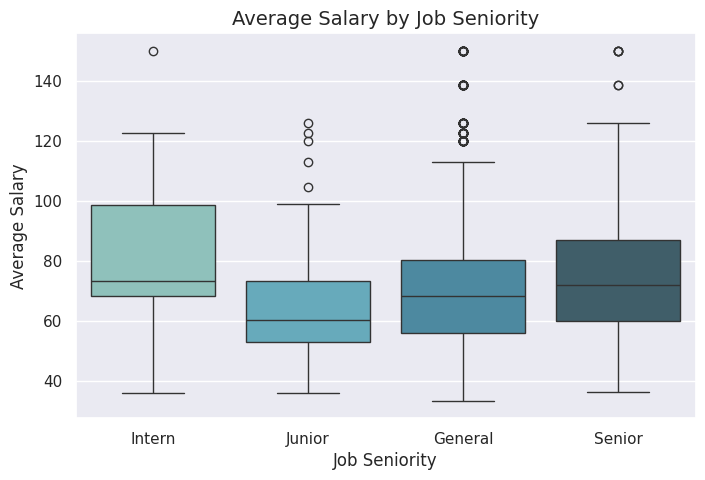

In [44]:
## Average Salary by Job Seniority (Boxplot)
plt.figure(figsize = (8,5))
sns.boxplot(x = 'job_seniority', y = 'avg_salary', data = DA1, order = ['Intern', 'Junior','General','Senior'], palette = 'GnBu_d')
plt.xlabel('Job Seniority')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job Seniority', fontsize = 14)

plt.show()